# DBScan

In [6]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

%matplotlib inline

## Características do algoritmo DBScan

- EPS: distância máxima entre 2 amostras para formar um cluster de mesmo tipo (vizinhos).
- minPts: É o número minimo de uma amostra em uma vizinhança para uma amostra ser classificada como "Core Point"
- Core Point: um pouco acima que os minPts na EPS.
- Border Point: um pouco abaixo que os minPts na EPS.
- Noise (Outlier): não é um Core ou Border.


## Carregando o conjunto de dados

In [7]:
iris = datasets.load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                 columns=iris['feature_names'] + ['Species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Treinando o modelo

In [8]:
model = DBSCAN(eps = 0.8, min_samples=19).fit(df)
print(model)

DBSCAN(eps=0.8, min_samples=19)


### Visualizar o resultado

In [9]:
df[model.labels_==-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
98,5.1,2.5,3.0,1.1,1.0
105,7.6,3.0,6.6,2.1,2.0
106,4.9,2.5,4.5,1.7,2.0
117,7.7,3.8,6.7,2.2,2.0
118,7.7,2.6,6.9,2.3,2.0
122,7.7,2.8,6.7,2.0,2.0
131,7.9,3.8,6.4,2.0,2.0


## Plotando o resultado

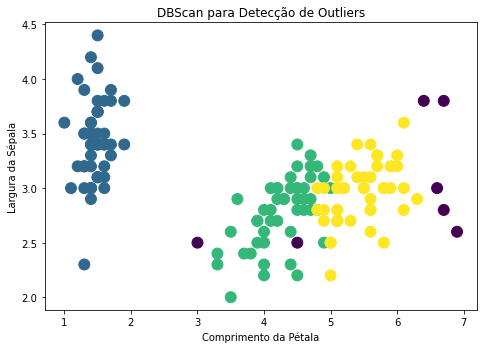

In [12]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
colors = model.labels_

ax.scatter(df.iloc[:,2], df.iloc[:,1], c=colors, s=120)
ax.set_xlabel('Comprimento da Pétala')
ax.set_ylabel('Largura da Sépala')

plt.title('DBScan para Detecção de Outliers')
plt.show()